# SLU03 | Visualization with Pandas and Matplotlib: Exercise notebook
***

## Start by importing these packages

In [1]:
# for evaluation purposes
import hashlib

import pandas as pd
import numpy as np
from plotchecker import PlotChecker

def _hash(s):
    """Function used to hash the answers and compare with the right answer."""
    
    return hashlib.blake2b(
        bytes(str(s), encoding='utf8'),
        digest_size=5
    ).hexdigest()

def get_data(p, ax=0):
    """Gets data from plot and concatenates it.
    
    This is required for hashing the plot results.
    """
    all_x_data = []
    lines = p.axis.get_lines()
    collections = axis.collections
    if len(lines) > 0:
        all_x_data.append(np.concatenate([x.get_xydata()[:, ax] for x in lines]))
    if len(collections) > 0:
        all_x_data.append(np.concatenate([x.get_offsets()[:, ax] for x in collections]))
    return np.concatenate(all_x_data, axis=0)

The learning objectives of this notebook are the following:

- Basics of Matplotlib
- Scatter plots
- Line charts
- Bar/column charts
- Histograms
- Box plots

Our main objective for these exercises is to help a supermarket understand more about its sales through visualizations. To do this we are going to use a **modified version** of [Supermarket Sales dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales).

The dataset contains sales information for several stores and is located at `data/supermarket_sales.csv`. It has the following fields:

>**`city`**: Location of supercenters   
>**`gender`**: Gender type of customer   
>**`product_line`**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel   
>**`quantity`**: Number of products purchased by customer   
>**`total`**: Total price including tax.   
>**`date`**: Date of purchase (Record available from January 2019 to March 2019)   
>**`time`**: Purchase time (10am to 9pm)   
>**`payment`**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)    
>**`tax`**: 5% tax payment of the purchase

There are multiple ways we can aggregate this data, and we will explore some of them.

In [2]:
supermarket_sales = pd.read_csv('data/supermarket_sales.csv', encoding='utf_8', sep=';')
rows, columns = supermarket_sales.shape
print(f'supermarket_sales:  {rows} records and {columns} fields.')
supermarket_sales.head()

supermarket_sales:  1000 records and 9 fields.


,city,gender,product_line,quantity,total,date,time,payment,tax
0,Yangon,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,26.1415
1,Naypyitaw,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,3.8200
2,Yangon,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,16.2155
3,Yangon,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,23.2880
4,Yangon,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,30.2085


For these exercises we will use `matplotlib.pyplot` module. We will start by importing together with some ✨magic✨.

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

***
## Exercise 1

To start, we will want to change some default settings:
* change the default pyplot chart size to 10 inches width and 10 inches height   
* change 'lines.linewidth' to 5   
* change 'lines.linestyle' to be a dotted line ':'

In [4]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['lines.linestyle'] = ':'

In [5]:
fig_params = plt.rcParams['figure.figsize']
linwidth_param = plt.rcParams['lines.linewidth']
linstyle_param = plt.rcParams['lines.linestyle']
assert _hash(fig_params) == '7398d547ef', 'Did you change the default figure sizes?'
assert _hash(linwidth_param) == 'f24d02e0e6', 'Did you change the default linewidth?'
assert _hash(linstyle_param) == '2429dda583', 'Did you change the default linestyle?'

print('--- Success ---')

--- Success ---


## 🛑 Important note about the grading

**Grading plots is difficult**, we are using `plotchecker` to grade the plots with `nbgrader`. 
For `plotchecker` to work with `nbgrader`, **we need to add on each cell**, the line

> **`axis = plt.gca();`**

**After the code required** to do the plot.

<div class="alert alert-danger">
    ⚠️ <b>NOTE: </b>If you get the <b>ImportError</b>, <i>plotchecker not defined</i>, make sure you activate the right environment for this unit!
</div>

> **For example**, *if we want to plot a `scatter plot` showing the relationship between **`total`** and **`tax`**  columns, we would do as follows:*

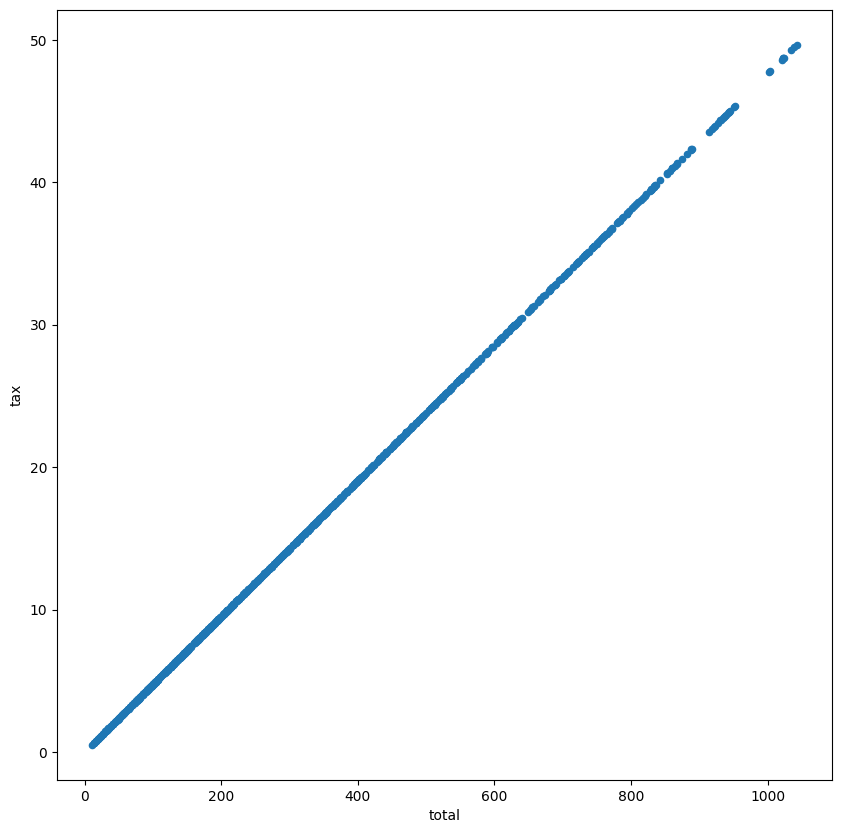

In [6]:
# code required to plot
supermarket_sales.plot.scatter(x='total', y='tax')

# last line in the cell required to "capture" the cell and being able to grade it with nbgrader
axis = plt.gca();

## Exercise 2

In the case we have a time variable, we can investigate if there are trends and/or seasonalities. There is one plot type that is especially good for this. Which one?

    A. Scatter plot   
    B. Line plot   
    C. Histogram   
    D. Bar plot   
    
Leave your answer below, assigned to the `exercise_2_plot_type` variable as a string. For example:
```
exercise_2_plot_type = 'E'
```

In [7]:
exercise_2_plot_type = 'B'

In [8]:
assert _hash(exercise_2_plot_type) == '90a8cbb480', 'Try again'

print('--- Success ---')

--- Success ---


In this case, our time veriable is `date` and the variable we want to investigate for trends and/or seasonalities is `total`. To finish this exercise you also need to add some extra information to the plot.

- set the plot **title** to **`Total sales per day`**.
- label the **x-axis** as **`Date`**.
- label the **y-axis** as **`Total sales`**.

Before plotting, we will reset matplotlib's parameters to the default ones.

In [9]:
plt.style.use('default')

<div class="alert alert-info">
    To calculate the average cost by supermarket rating we need to perform an <b><a href='https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html'>aggregation</a></b>, pandas support this by doing a technique called <b>
    <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html'>Split-Apply-Combine</a></b>. <b>This will be explained in the Data Wrangling Specialization.</b> For now we will do the grouping for you:
</div>

In [10]:
sales_by_day = supermarket_sales.groupby('date', as_index=False)["total"].sum()
sales_by_day.head()

,date,total
0,1/1/2019,4745.1810
1,1/10/2019,3560.9490
2,1/11/2019,2114.9625
3,1/12/2019,5184.7635
4,1/13/2019,2451.2040


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>sales_by_day</b> for the exercise
</div>

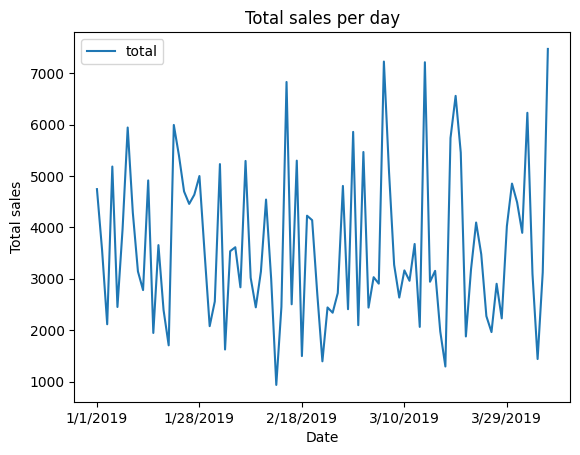

In [11]:
# YOUR CODE HERE
sales_by_day.plot(x = "date", y= "total")
plt.title("Total sales per day")
plt.xlabel("Date")
plt.ylabel("Total sales")
axis = plt.gca();

In [12]:
pc = PlotChecker(axis)
l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(sorted(get_data(pc))) in ['4a9d169435'], 'Did you set the right variables for the plot axes?'
assert _hash(sorted(get_data(pc,1))) in ['ed382d737c'], 'Did you set the right variables for the plot axes?'
assert _hash(pc.title) in ['79f88d6489'], 'Did you set the right plot title?'
assert _hash(l) in ['234d0fee0f'], 'Did you set the right plot axes?'

print('--- Success ---')

--- Success ---


***

## Exercise 3

Sometimes we might want to check if our assumptions are correct. 

What kind of plot should we use to help us understand the correlation between two different variables?

    A. Scatter plot   
    B. Line plot   
    C. Histogram   
    D. Bar plot   

In [13]:
# YOUR CODE HERE
exercise_3_plot_type = "A"

In [14]:
assert _hash(exercise_3_plot_type) == 'b685b2f862', 'Try again'

print('--- Success ---')

--- Success ---


One assumption we can check is if our records with more units are the ones that have the highest value. In this case we want to know if **`total`** has a positive correlation with **`quantity`**. Plot these two variables with the adequate plot type below.

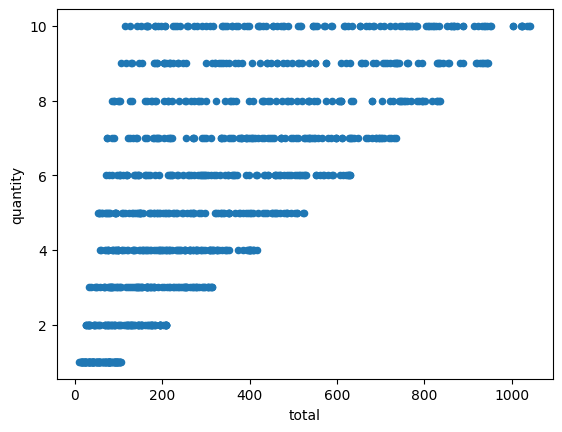

In [15]:
# YOUR CODE HERE
supermarket_sales.plot.scatter(x = "total", y= "quantity")
axis = plt.gca();

In [16]:
pc = PlotChecker(axis)
data = get_data(pc)
l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(data)) == 'a473547bdb', 'Did you set the right variables for the plot axes?'
assert _hash(l) in ['0e0de810e0', '8f34002372'], 'Did you set the right variables for the plot axes?'
assert _hash(get_data(pc,1)) in ['87037ed773'], 'Did you set the right variables for the plot axes?'

print('--- Success ---')

--- Success ---


## Exercise 4

Now we want to compare just one simple statistic for different categories. We are not interested in other statistics, just one. Which plot should we use for this?

    A. Box plot   
    B. Bar plot  
    C. Histogram   
    D. Pie plot

In [17]:
# YOUR CODE HERE
exercise_4_plot_type = "B"

In [18]:
assert _hash(exercise_4_plot_type) == '90a8cbb480', 'Try again'

print('--- Success ---')

--- Success ---


How should the plot be in the case we want the count of purchases by category of `unit_price`? In this case we have an ordinal categorical varible: there is an order in them. 

- label the **x-axis** as **`Unit Price (rounded to dozens)`** and **size** **`22`**.
- label the **y-axis** as **`Number of Purchases`** and **size** **`22`**.
- set the plot **title** to **`Purchases by Unit Price`** and **size** **`30`**.

Doing the **grouping** for you:

In [19]:
purchases_by_unit_price = supermarket_sales.assign(unit_price = lambda d: (d['total'] / d['quantity']).round(-1))
purchases_by_unit_price = purchases_by_unit_price.groupby('unit_price', as_index=False)['total'].count()
purchases_by_unit_price = purchases_by_unit_price.rename(columns={'unit_price': 'unit_price_dozens'})
purchases_by_unit_price.head()

,unit_price_dozens,total
0,10.0,40
1,20.0,118
2,30.0,98
3,40.0,102
4,50.0,111


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>purchases_by_unit_price</b> for the exercise
</div>

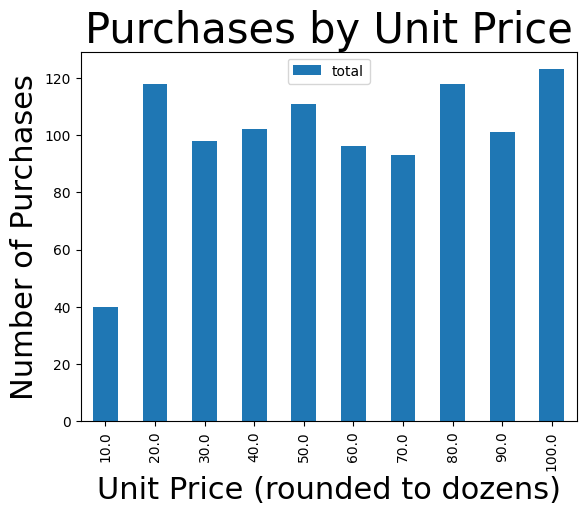

In [20]:
# YOUR CODE HERE
purchases_by_unit_price.plot.bar(x="unit_price_dozens", y="total")
plt.title("Purchases by Unit Price", size =30)
plt.xlabel("Unit Price (rounded to dozens)", size = 22)
plt.ylabel("Number of Purchases", size=22)

axis = plt.gca();

In [21]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]

pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(pc._patches)) in ['55179f3931'], 'Did you set the right variable and the right plot type?'
assert _hash(np.sort(pc.widths)) in ['933332ec76', 'b71a74c306'], 'Did you set the right variable and the right plot type?'
assert _hash(np.sort(pc.heights)) in ['ea16cd0590'], 'Did you set the right variable and the right plot type?'
assert _hash(pc.title) in ['69754ee50f'], 'Did you set the right plot title?'
assert _hash(l) in ['1f43d9f466'], 'Did you set the right plot axes?'

print('--- Success ---')

--- Success ---


Another case is when we want to compare the median price by **`product_line`**.<br> 
**Note:** Since we are comparing categories with long names, take that in mind when deciding to plot horizontally or vertically.<br>

Plot the adequate visualization and add the following extra information:

- label the **x-axis** as **`Price (median)`**.
- label the **y-axis** as **`Product Line`**.
- change the **plot color** to **`orange`**.

Again, we will do the **transformations** for you:

In [22]:
price_per_product_line = supermarket_sales.assign(unit_price = lambda d: d['total'] / d['quantity'])
price_per_product_line = price_per_product_line.groupby('product_line', as_index=False)['unit_price'].median()
price_per_product_line = price_per_product_line.rename(columns={'unit_price': 'median_unit_price'})
price_per_product_line

,product_line,median_unit_price
0,Electronic accessories,54.08025
1,Fashion accessories,57.84450
2,Food and beverages,56.69475
3,Health and beauty,60.27525
4,Home and lifestyle,58.36950
5,Sports and travel,61.58250


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>price_per_product_line</b> for the exercise
</div>

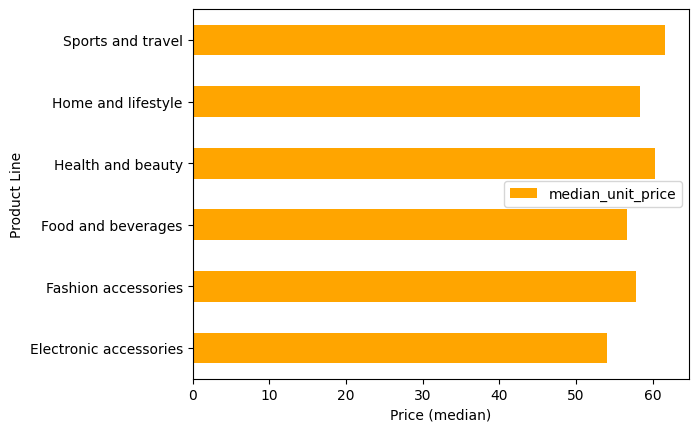

In [23]:
# YOUR CODE HERE
price_per_product_line.plot.barh(x="product_line", y="median_unit_price", color="orange")
plt.xlabel("Price (median)")
plt.ylabel("Product Line")

axis = plt.gca();

In [24]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]

pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(pc._patches)) in ['0e0a5ac74a'], 'Did you set the right categorical variable and the right plot type?'
assert _hash(np.sort(pc.widths)) in ['6603f07f48'], 'Did you set the right categorical variable and the right plot type?'
assert _hash(l) in ['621919aff5'], 'Did you set the right plot axes?'
assert _hash([pc._patches[i].get_facecolor() for i,n in enumerate(pc._patches)]) == '98f5df581e', 'Did you change the plot color?'

print('--- Success ---')

--- Success ---


## Exercise  5

There is one plot in `matplotlib` that can show us several statistics, such as quartiles and outliers. Which one?

    A. Line plot 
    B. Histogram  
    C. Stem plot 
    D. Box plot

In [25]:
# YOUR CODE HERE
exercise_5_plot_type = "D"

In [26]:
assert _hash(exercise_5_plot_type) == '23db524fe4', 'Try again'

print('--- Success ---')

--- Success ---


Now, we will analyze the types of payment and check these statistics for the payments made. Following the steps below:

- make a plot that displays the **`total`** by **`payment`** type and that allows us to check if there are outliers.
- change the default **plot style** to **`ggplot`**.
- set the plot argument **vert** to **`False`**.
- set the plot argument **figsize** to **`9`** inches width and **`9`** inches height.
- set the plot argument **grid** to **`False`**
- set the plot argument **fontsize** to **`20`**

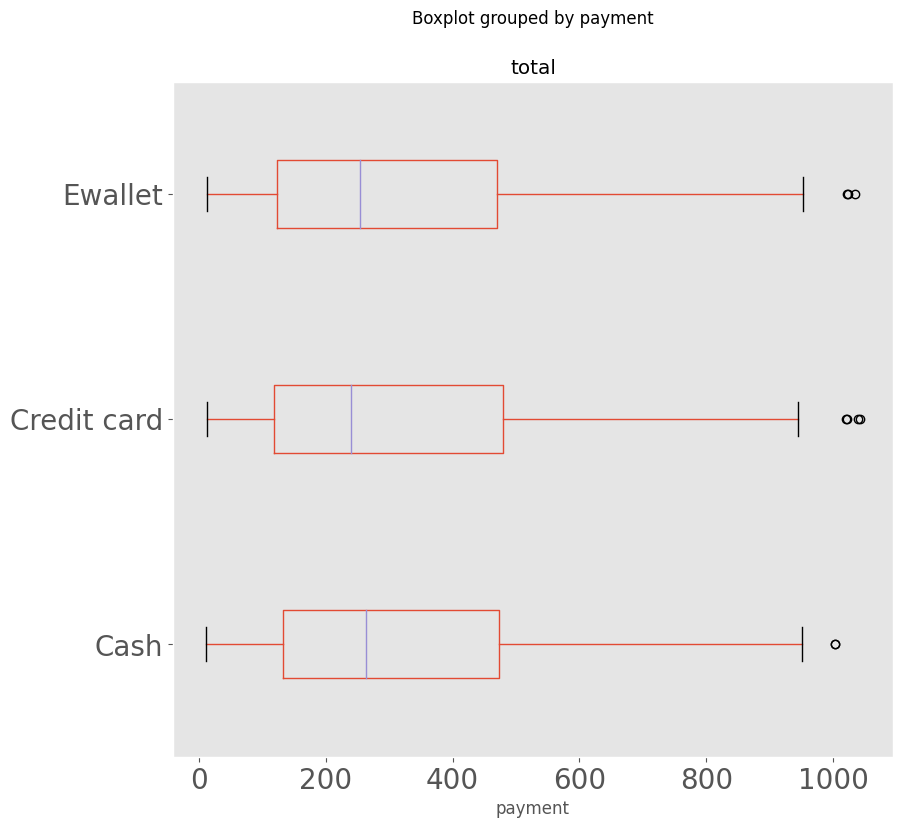

In [27]:
# YOUR CODE HERE
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [9,9]
supermarket_sales.boxplot(column="total", by="payment", vert=False, grid = False, fontsize=20)

axis = plt.gca();

In [28]:
pc = PlotChecker(axis)
pc._lines = pc.axis.get_lines()
pc.colors = np.array([pc._color2rgb(x.get_color()) for x in pc._lines])

assert _hash(pc.colors[0]) in ['78183b94a9'], 'Did you set the right plot style?'
assert _hash(pc.yticklabels) in ['46365c9db6'], 'Did you select the right categorical variable for the plot?'
assert _hash(pc.xticklabels) in ['3b92a750f9'], 'Did you select the right numerical variable for the plot?'

print('--- Success ---')

--- Success ---


## Exercise 6

There is another plot that can tell us a lot about the statistics of the data. These are normally plots that show us the distribution of variables. 

Which plot can we use to visualize exactly how the **`total`** sales is distributed in the city of Yangon?

    A. Box plot   
    B. Bar plot  
    C. Histogram   
    D. Pie plot

In [29]:
# YOUR CODE HERE
exercise_6_plot_type = "C"

In [30]:
assert _hash(exercise_6_plot_type) == 'f72385315c', 'Try again'

print('--- Success ---')

--- Success ---


In this case, without using any kind of aggregation, we would like to know if in the city of Yangon there are more sales happening with values closer to the values {100, 200, 300, 400, 500}. To find this, follow these steps:

- filter the sales to only have sales in the city of Yangon
- save the filtered dataset in a new variable named `yangon_sales`
- plot and show only `total` sales between **0 and 500**.
> 💡 **hint:** _set a limit_ 
- change the number of **bins to 20**
- change the **plot color** to **`lightblue`**.
- set **edgecolor** to **`blue`**

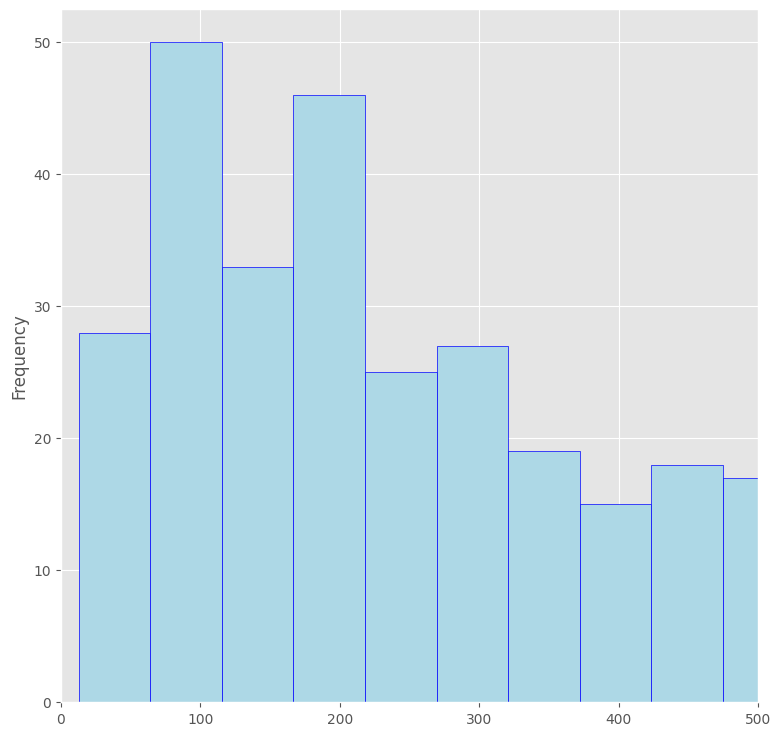

In [31]:
# YOUR CODE HERE

yangon_sales = supermarket_sales[supermarket_sales.city=='Yangon']

yangon_sales.total.plot.hist(xlim=(0,500), bins = 20, color = "lightblue", edgecolor = "blue")


axis = plt.gca();

In [32]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]
pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

assert _hash(yangon_sales['city'].unique()) in ['86c4bc981a'], 'Did you filter the city by Yangon?'
assert _hash(np.sort(pc.widths)) in ['793178e1c4'], 'Did you set the right plot type? You should not change the dataset.'
assert _hash(np.sort(pc.heights)) in ['35cf8d775d'], 'Did you set the right plot type? You should not change the dataset.'
assert _hash(pc.xlim[0]) == 'c64e30c19f', 'Did you set the right limit?'
assert _hash(pc.xlim[1]) == 'b35312f97f', 'Did you set the right limit?'
assert _hash([pc._patches[i].get_facecolor() for i,n in enumerate(pc._patches)]) == 'a2424627e4', 'Did you change the plot color?'
assert _hash([pc._patches[i].get_edgecolor() for i,n in enumerate(pc._patches)]) == '2bba1400c5', 'Did you change the plot edgecolor?'

print('--- Success ---')

--- Success ---



# 🏁 Ungraded Exercise 🏁
Load the file misterious_data.csv and use data visualization to answer the following questions:

* How is the distribution of **x** in general?
* Are there any **outlier** in any of the fields?
* Which **2 charts** better represent the underlying data?
* Change their **style** to **`bmh`**.
* Add **titles** to each chart explaining them.